In [40]:
#Use this notebook to create 2D and 3D plots for videos analyzed in DeepLabCut!

#This notebook requires the filtered.h5 files generated by DeepLabCut in the Analyze Videos step using deeplabcut.filter_predictions()

In [41]:
#(this will take a few minutes to install all the dependences!)
!pip install deeplabcut
#!pip install git+https://github.com/DeepLabCut/DeepLabCut.git
!pip install --upgrade scikit-image
%reload_ext numpy
%reload_ext scipy
%reload_ext matplotlib
%reload_ext mpl_toolkits

!pip install git+https://github.com/aleju/imgaug.git

  Using cached scikit_image-0.18.1-cp39-cp39-manylinux1_x86_64.whl (28.9 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
  Using cached scikit_image-0.19.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.1
    Uninstalling scikit-image-0.18.1:
      Successfully uninstalled scikit-image-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.2.1 requires scikit-image<=0.18.1,>=0.17, but you have scikit-image 0.19.3 which is incompatible.
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-2ni_itl8
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-2ni_itl8
  Res

In [42]:
# Importing the toolbox (takes several seconds) 

import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [43]:
#This cell defines a funciton (PlotTrajectoryByMinute) to create 2D plots of several videos at once. 
#You can alter minutesPerPlot to change the time increments displayed in each plot

def PlotTrajectoryByMinute(title, hdf_path, DLCscorer, bpt, fps=25, numColumns=3, minutesPerPlot = 5):
  Dataframe = pd.read_hdf(hdf_path)

  fpm = fps * 60
  numFramesTotal = len(Dataframe.index)
  minutesTotal = math.floor(numFramesTotal / (minutesPerPlot*fpm)) #gets number of minutes in the video, rounded down to plot each one
  numRows = math.ceil(minutesTotal / numColumns)

  dx, dy = 5, 3

  # If you want to "zoom in" on the mouse in each time interval, set sharex=False, sharey=False
  # For equal scaling in all subplots, set sharex=True, sharey=True
  fig, axs = plt.subplots(numRows, numColumns, constrained_layout=True, sharex=False, sharey=False, figsize=((dx * numColumns), (dy * numRows + 1/3))) 

  lowIndex = 0
  highIndex = minutesPerPlot*fpm
  currentMinute = 0
  for n, ax in enumerate(axs.flatten()):
    subDf = Dataframe[lowIndex:highIndex]
    sub_xsnout = subDf[DLCscorer][bpt]['x'].values
    sub_ysnout = subDf[DLCscorer][bpt]['y'].values

    ax.scatter(sub_xsnout,sub_ysnout, s=5, c=subDf.index.values, cmap='plasma')
    ax.invert_yaxis()

    subtitle = 'Minute ' + str(currentMinute) + ' to ' + str(currentMinute + minutesPerPlot)
    ax.set_title(subtitle, fontsize='large', loc='left')

    ax.tick_params(
      axis='both',
      which='both',
      bottom=True,
      top=False,
      left=True,
      right=False,
      labelleft=True,
      labelbottom=True)

    lowIndex += minutesPerPlot*fpm
    highIndex += minutesPerPlot*fpm
    currentMinute += minutesPerPlot

  fig.suptitle(title, fontsize=24)

  plt.show()

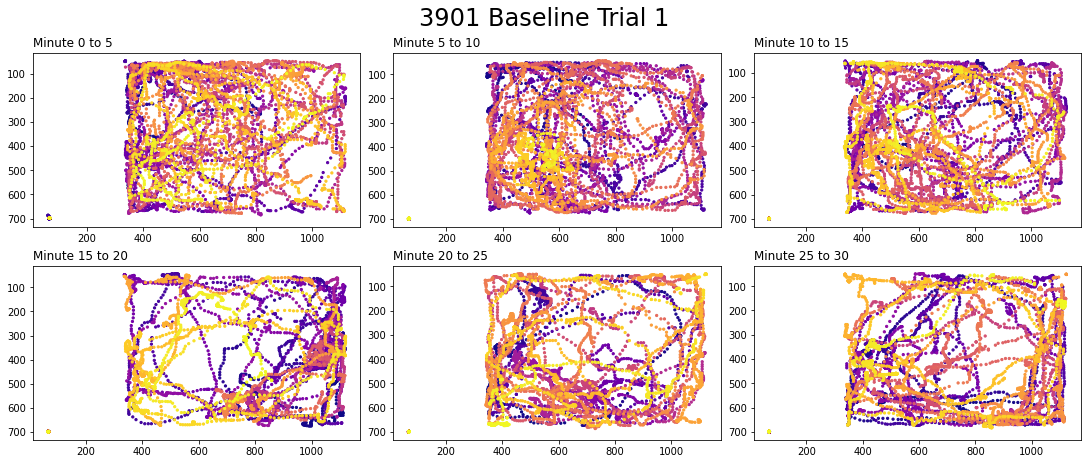

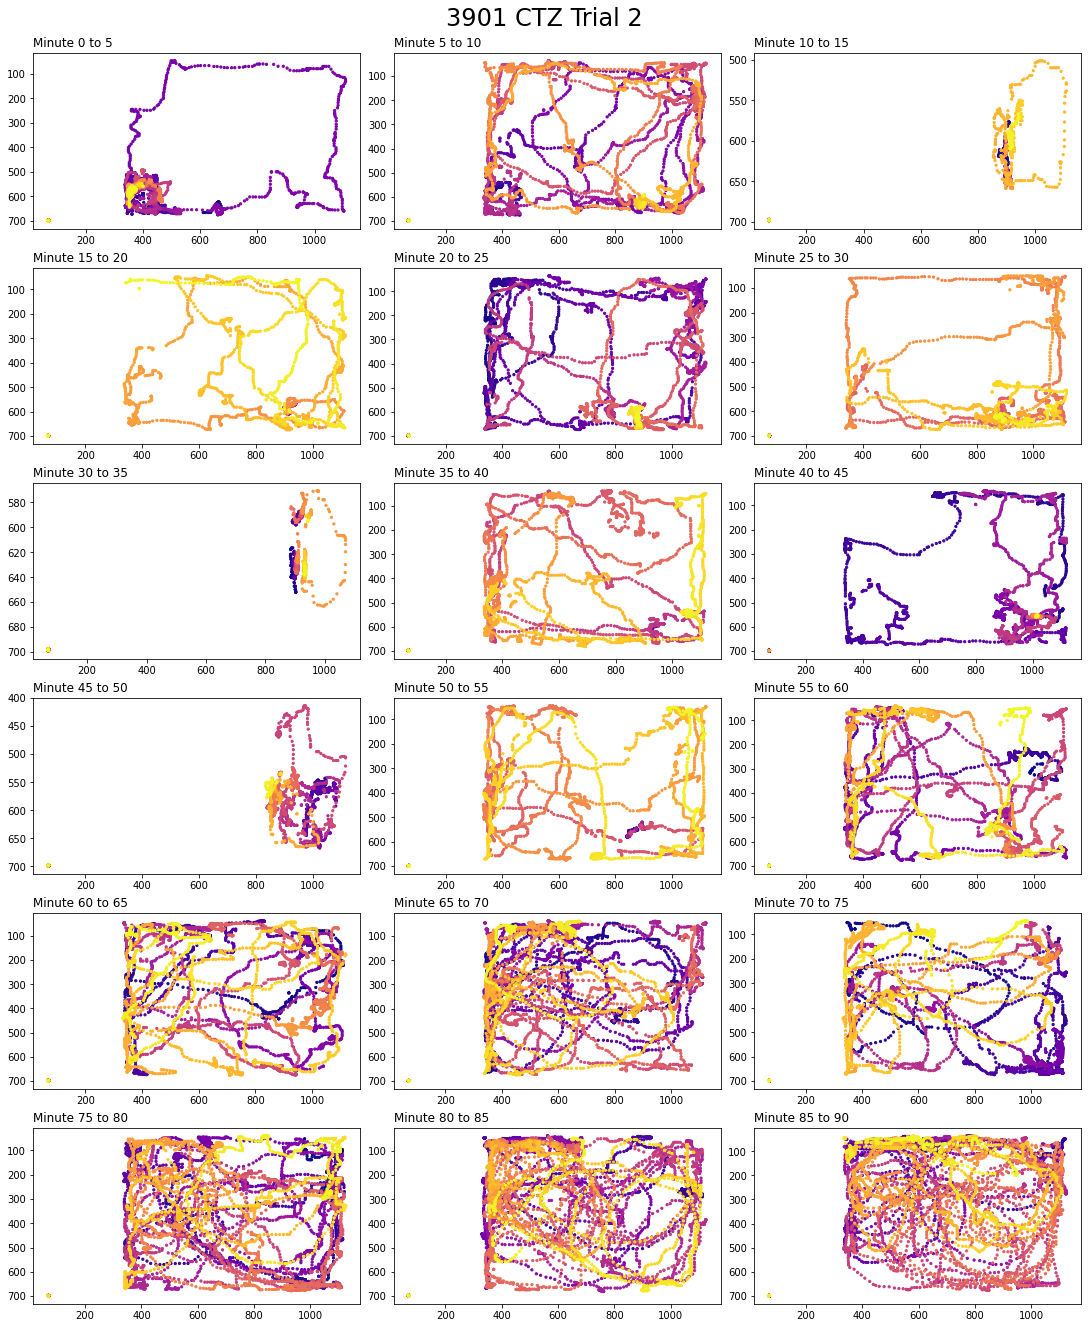

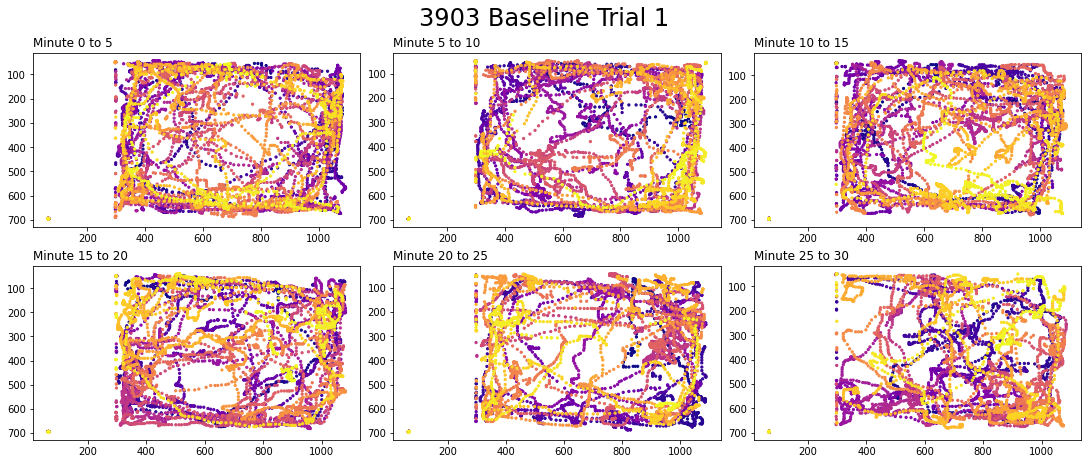

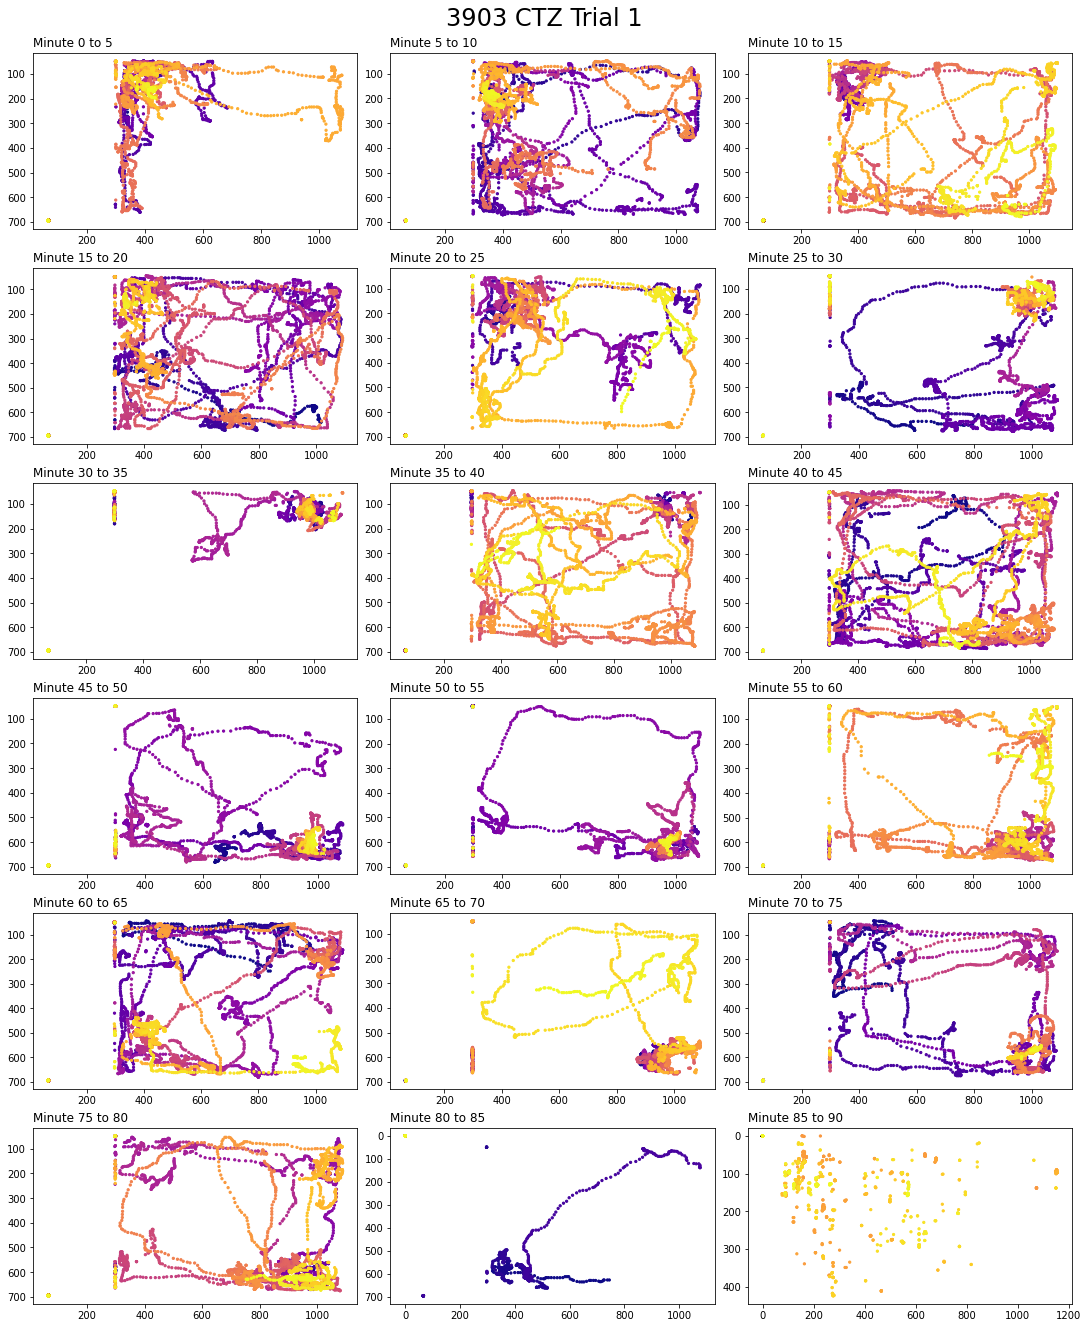

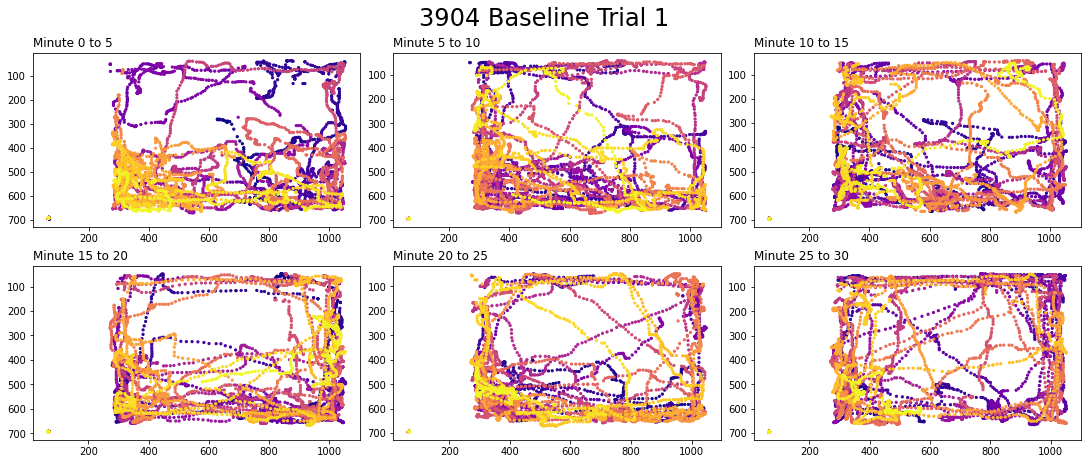

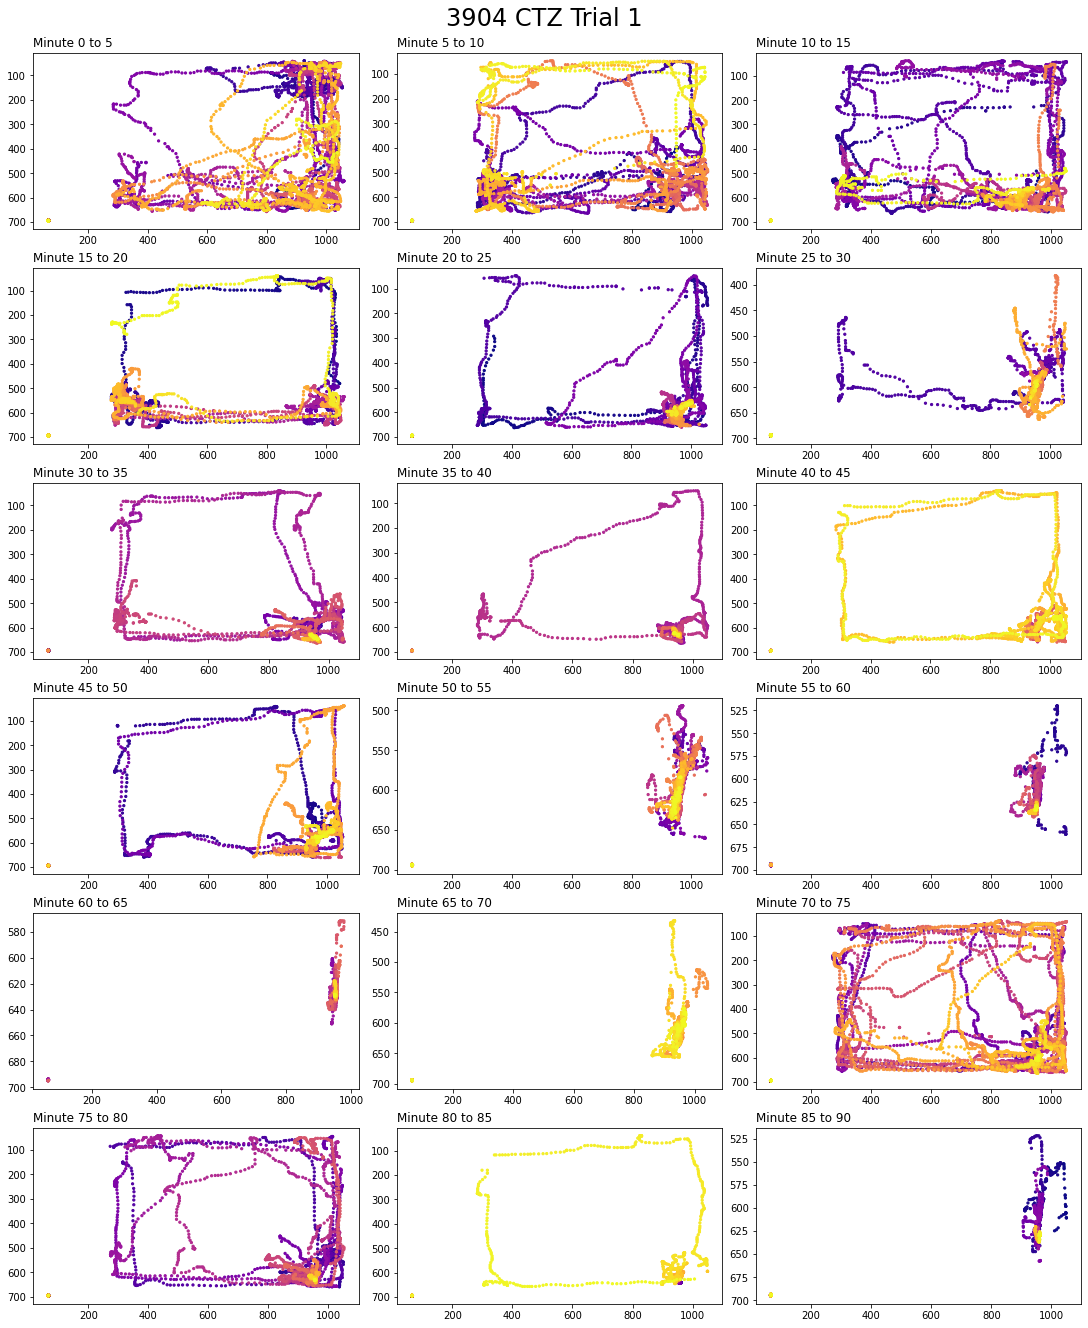

In [44]:
#The code below follows the format of the PlotTrajectoryByMinute function defined above.

#def PlotTrajectoryByMinute(title, hdf_path, DLCscorer, bpt, fps=25, numColumns=3, minutesPerPlot = ):

#Change the string variables below to reflect the title, hdf_path, DLCscorer, and bpt you want to plot.

#hdf_path should reflect the filtered.h5 file obtained from DeepLabCut for each video
#DLC scorer should reflect the network used to train the videos and can also be found at the end of the filtered.h5 file name (after the video name) you use as hdf_path. Refer to the examples below.
#'snout' is the most commonly used body part but you can use any body part that was labeled in the videos

#Examples shown below

PlotTrajectoryByMinute('3901 Baseline Trial 1',
                       '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3901_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                       'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000',
                       'snout')
PlotTrajectoryByMinute('3901 CTZ Trial 2',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrround2ffz_3901_f_Trial2DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000',
                      'snout')
PlotTrajectoryByMinute('3903 Baseline Trial 1',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3903_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000',
                      'snout')
PlotTrajectoryByMinute('3903 CTZ Trial 1',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrffz_3903_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000',
                      'snout')
PlotTrajectoryByMinute('3904 Baseline Trial 1',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3904_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000',
                      'snout')
PlotTrajectoryByMinute('3904 CTZ Trial 1',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrffz_3904_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000',
                      'snout')
print()

In [45]:
#Now for 3D plotting!

#This cell defines a funciton (plotTrajectory3DSubplots) to create 3D plots of several videos at once. 
#You can alter minutesPerPlot to change the time increments displayed in each plot

def plotTrajectory3DSubplots(title, hdf_path, DLCscorer, bpt = 'snout', fps=25, numColumns=3, minutesPerPlot = 10):
    Dataframe = pd.read_hdf(hdf_path)
    
    fpm = fps * 60
    numFramesTotal = len(Dataframe.index)
    minutesTotal = math.floor(numFramesTotal / (minutesPerPlot*fpm)) #gets number of minutes in the video, rounded down to plot each one
    numRows = math.ceil(minutesTotal / numColumns)
    
    dx, dy = 10, 10

    # If you want to "zoom in" on the mouse in each time interval, set sharex=False, sharey=False
    # For equal scaling in all subplots, set sharex=True, sharey=True
    fig, axs = plt.subplots(numRows, numColumns, subplot_kw=dict(projection='3d'), constrained_layout=True, sharex=False, sharey=False, figsize=((dx * numColumns), (dy * numRows + 1/3))) 
    
    lowIndex = 0
    highIndex = minutesPerPlot*fpm
    currentMinute = 0
    
    x_snout = Dataframe[DLCscorer][bpt]['x'].values
    y_snout = Dataframe[DLCscorer][bpt]['y'].values
    
    for n, ax in enumerate(axs.flatten()):
        subDf = Dataframe[lowIndex:highIndex]
        sub_xsnout = subDf[DLCscorer][bpt]['x'].values
        sub_ysnout = subDf[DLCscorer][bpt]['y'].values
        

        ax.scatter3D(sub_xsnout, subDf.index.values, sub_ysnout, s=2, c=subDf.index.values, cmap='viridis')
        ax.invert_zaxis()
        ax.set_xlabel('x (pixels)')
        ax.set_ylabel('time')
        ax.set_zlabel('y (pixels)')
        
        ax.set_box_aspect(((x_snout.max() - x_snout.min()), 5000, (y_snout.max() - y_snout.min())))
        
        subtitle = 'Minute ' + str(currentMinute) + ' to ' + str(currentMinute + minutesPerPlot)
        ax.set_title(subtitle, fontsize=30, loc='left')

        ax.tick_params(
          axis='both',
          which='both',
          bottom=True,
          top=False,
          left=True,
          right=False,
          labelleft=True,
          labelbottom=True)

        lowIndex += minutesPerPlot*fpm
        highIndex += minutesPerPlot*fpm
        currentMinute += minutesPerPlot

    fig.suptitle(title, fontsize=60)

    plt.show()

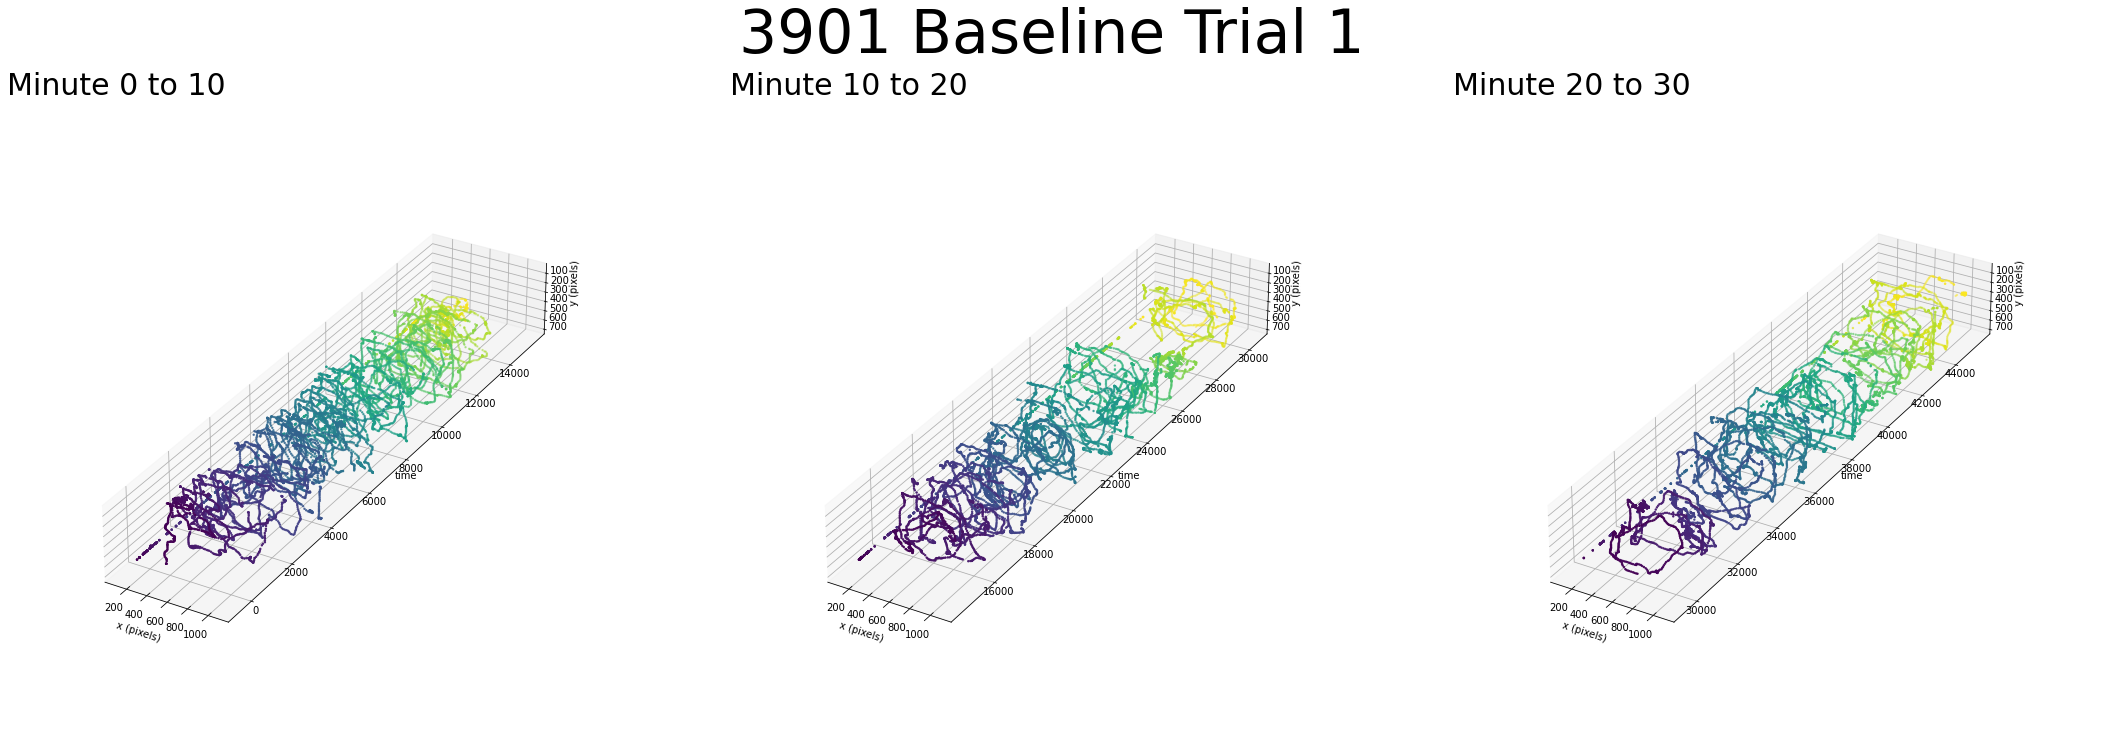

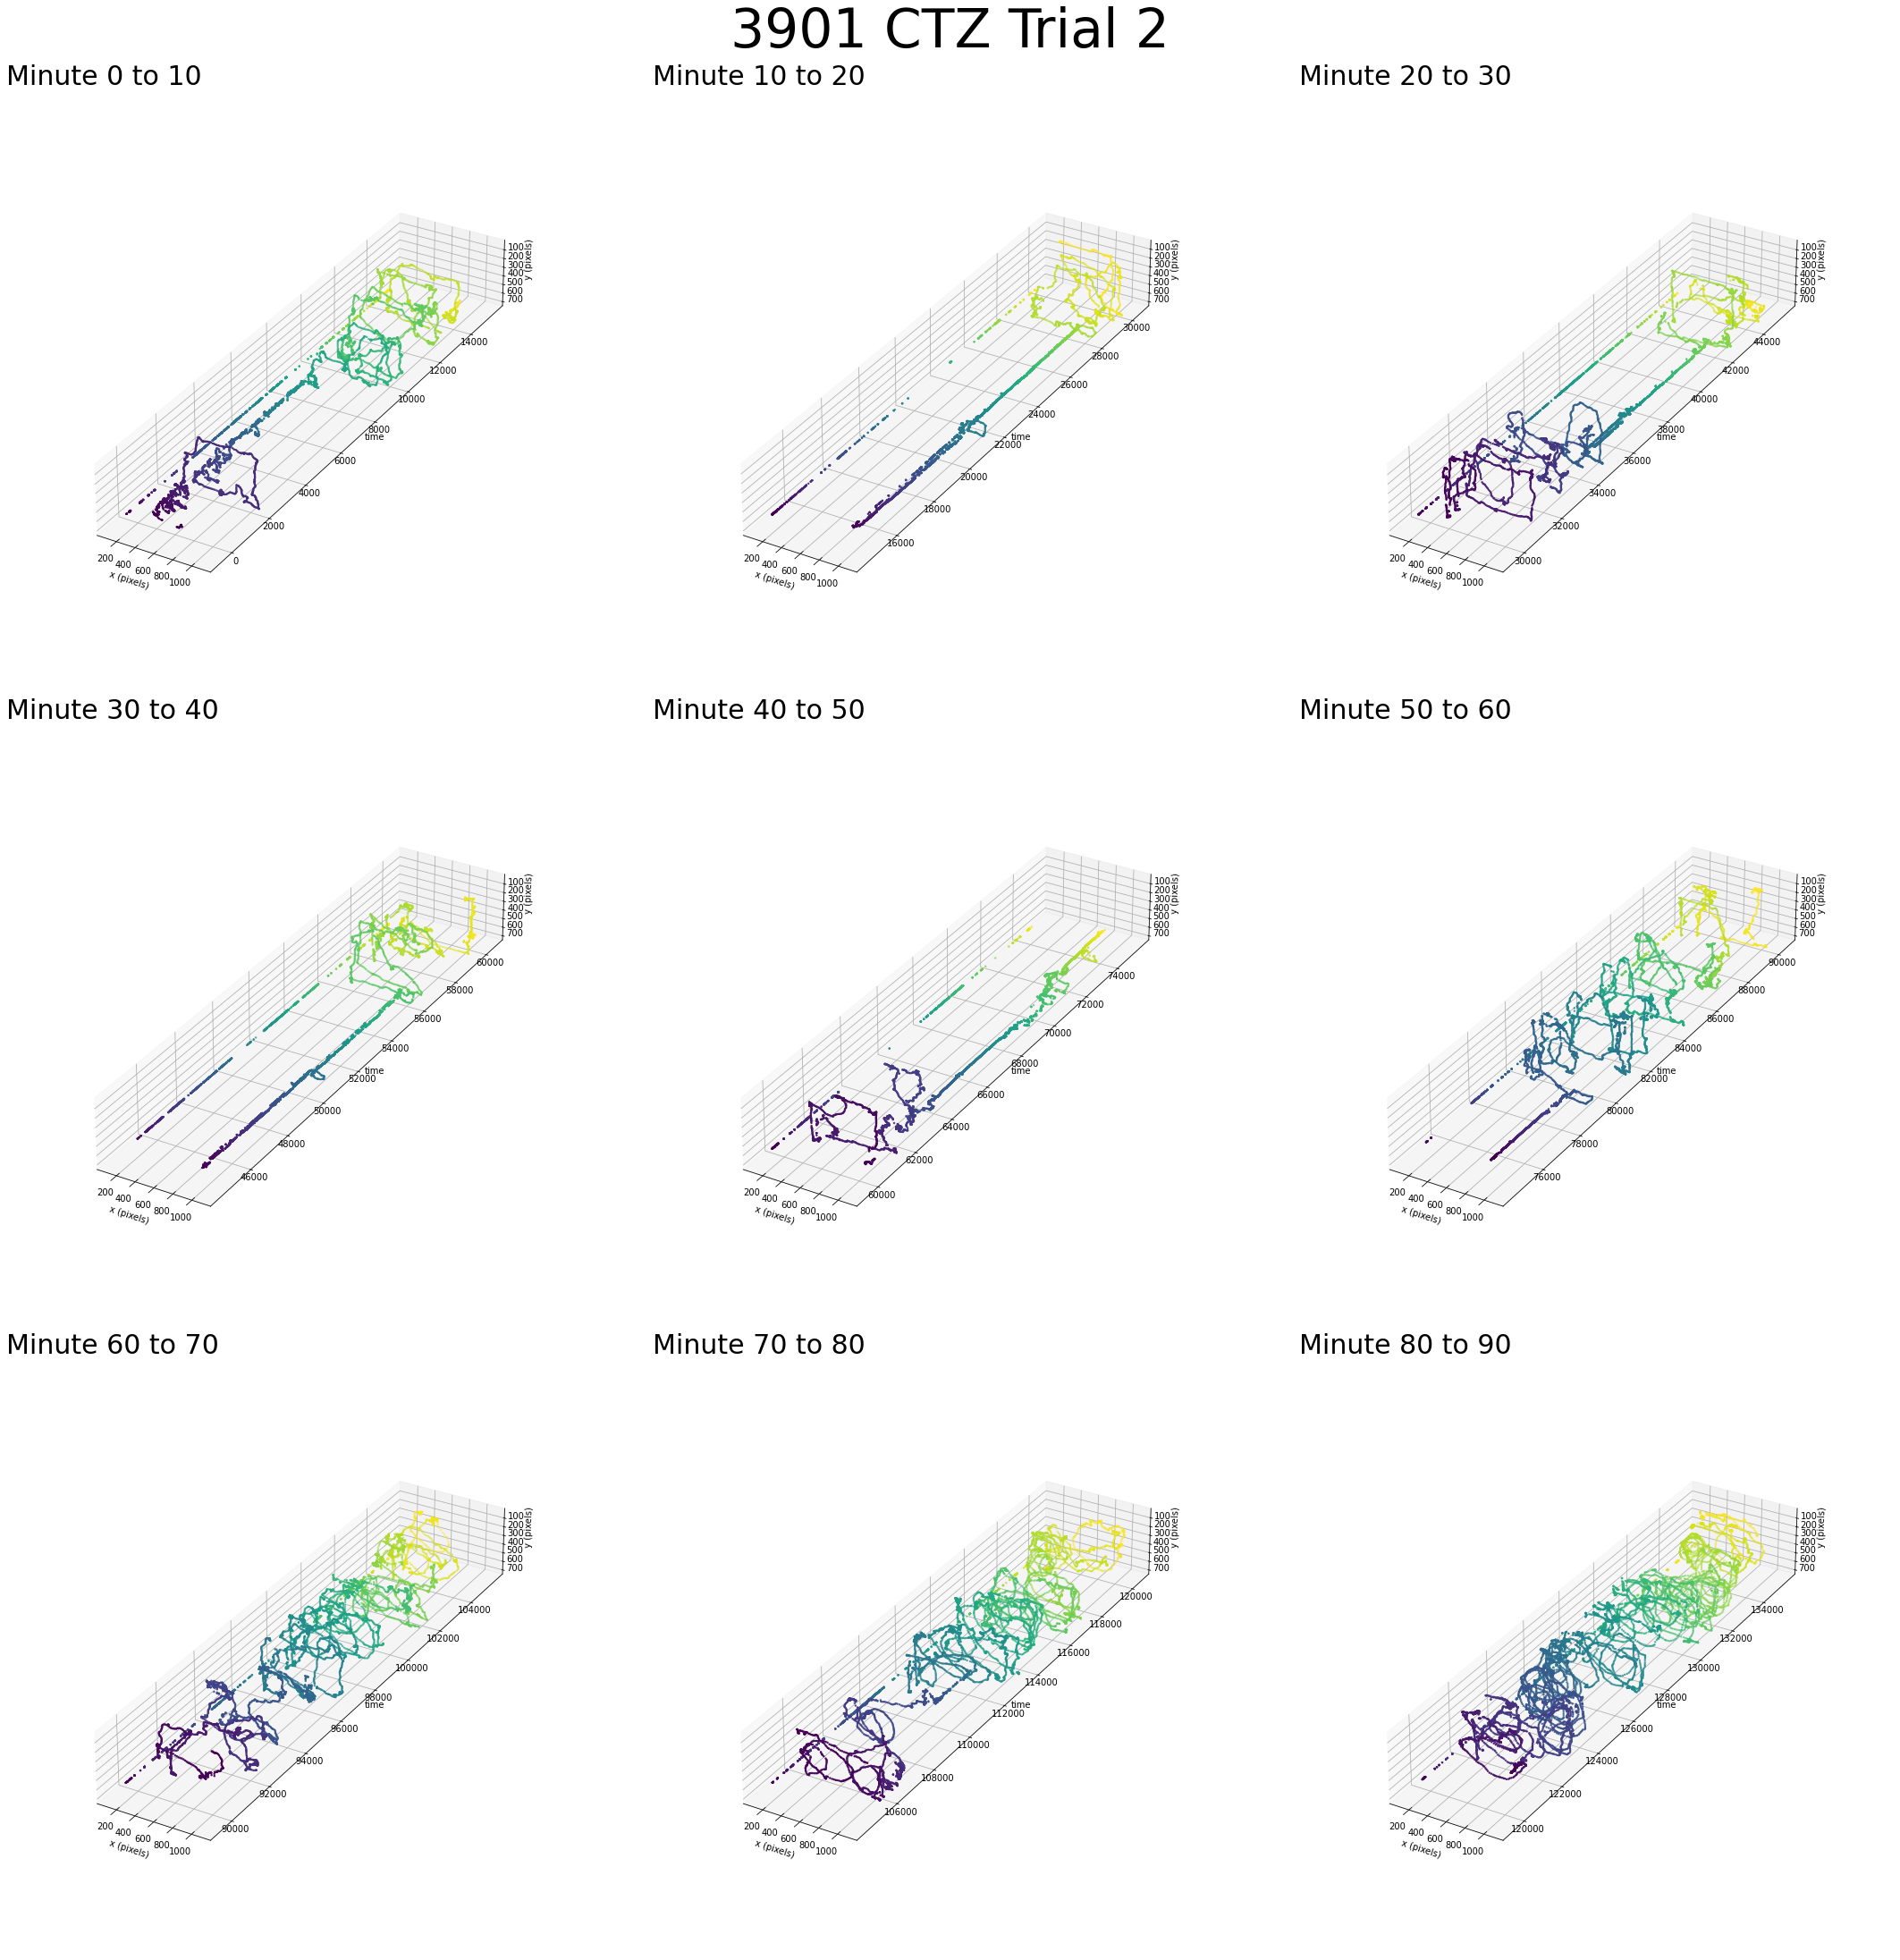

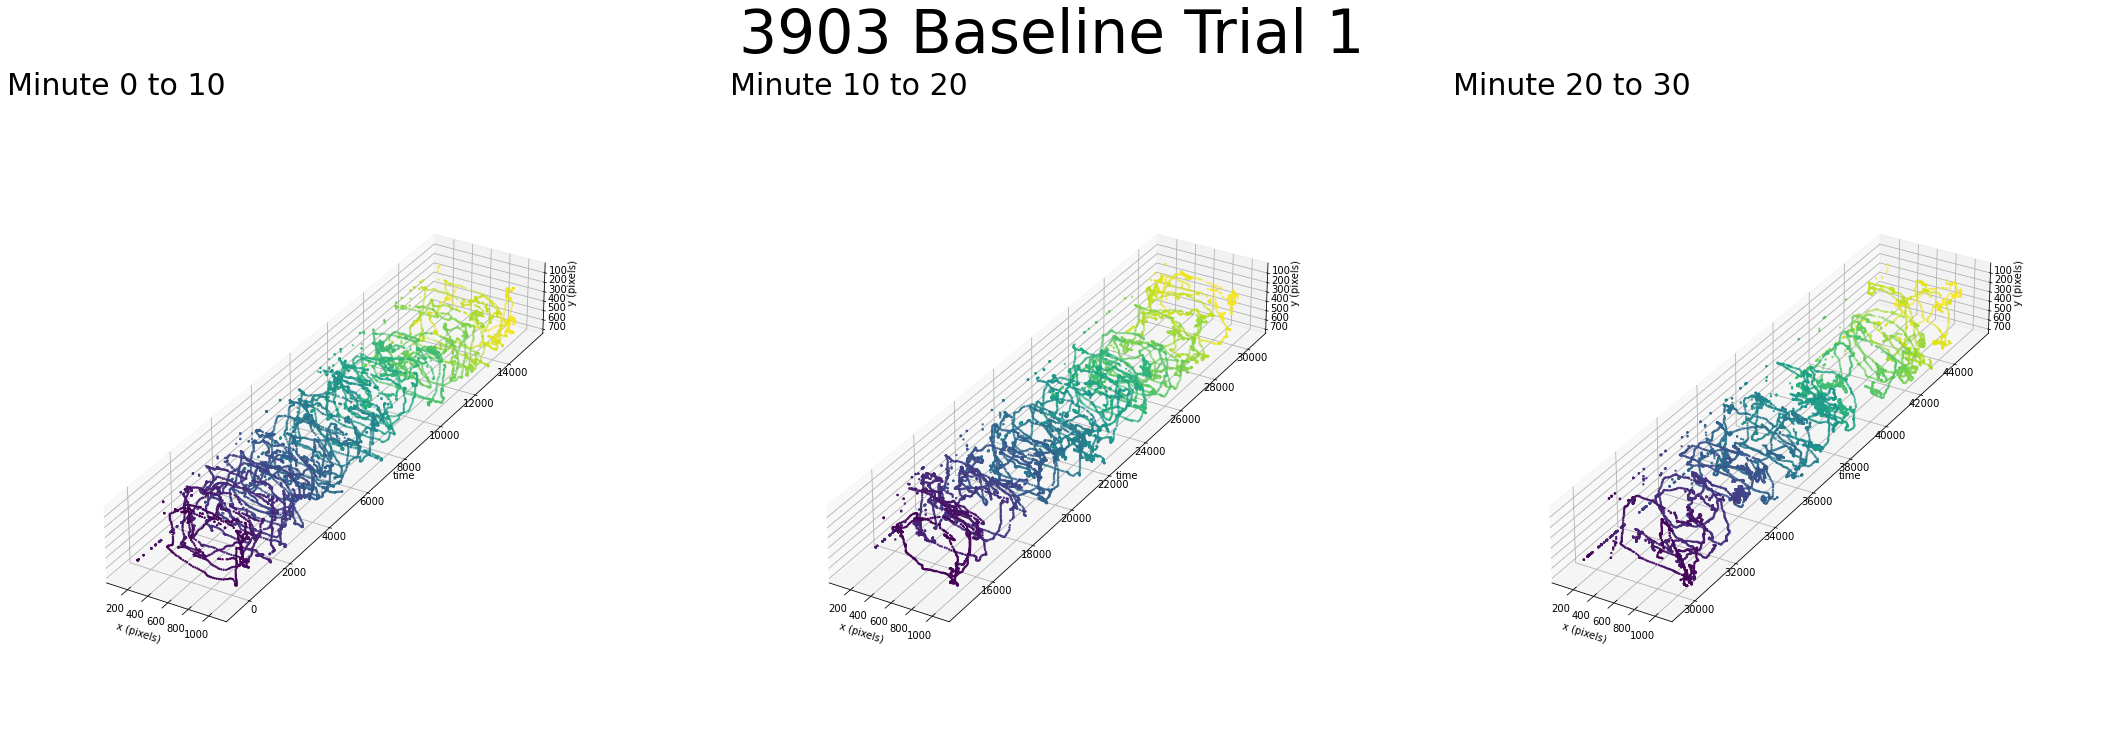

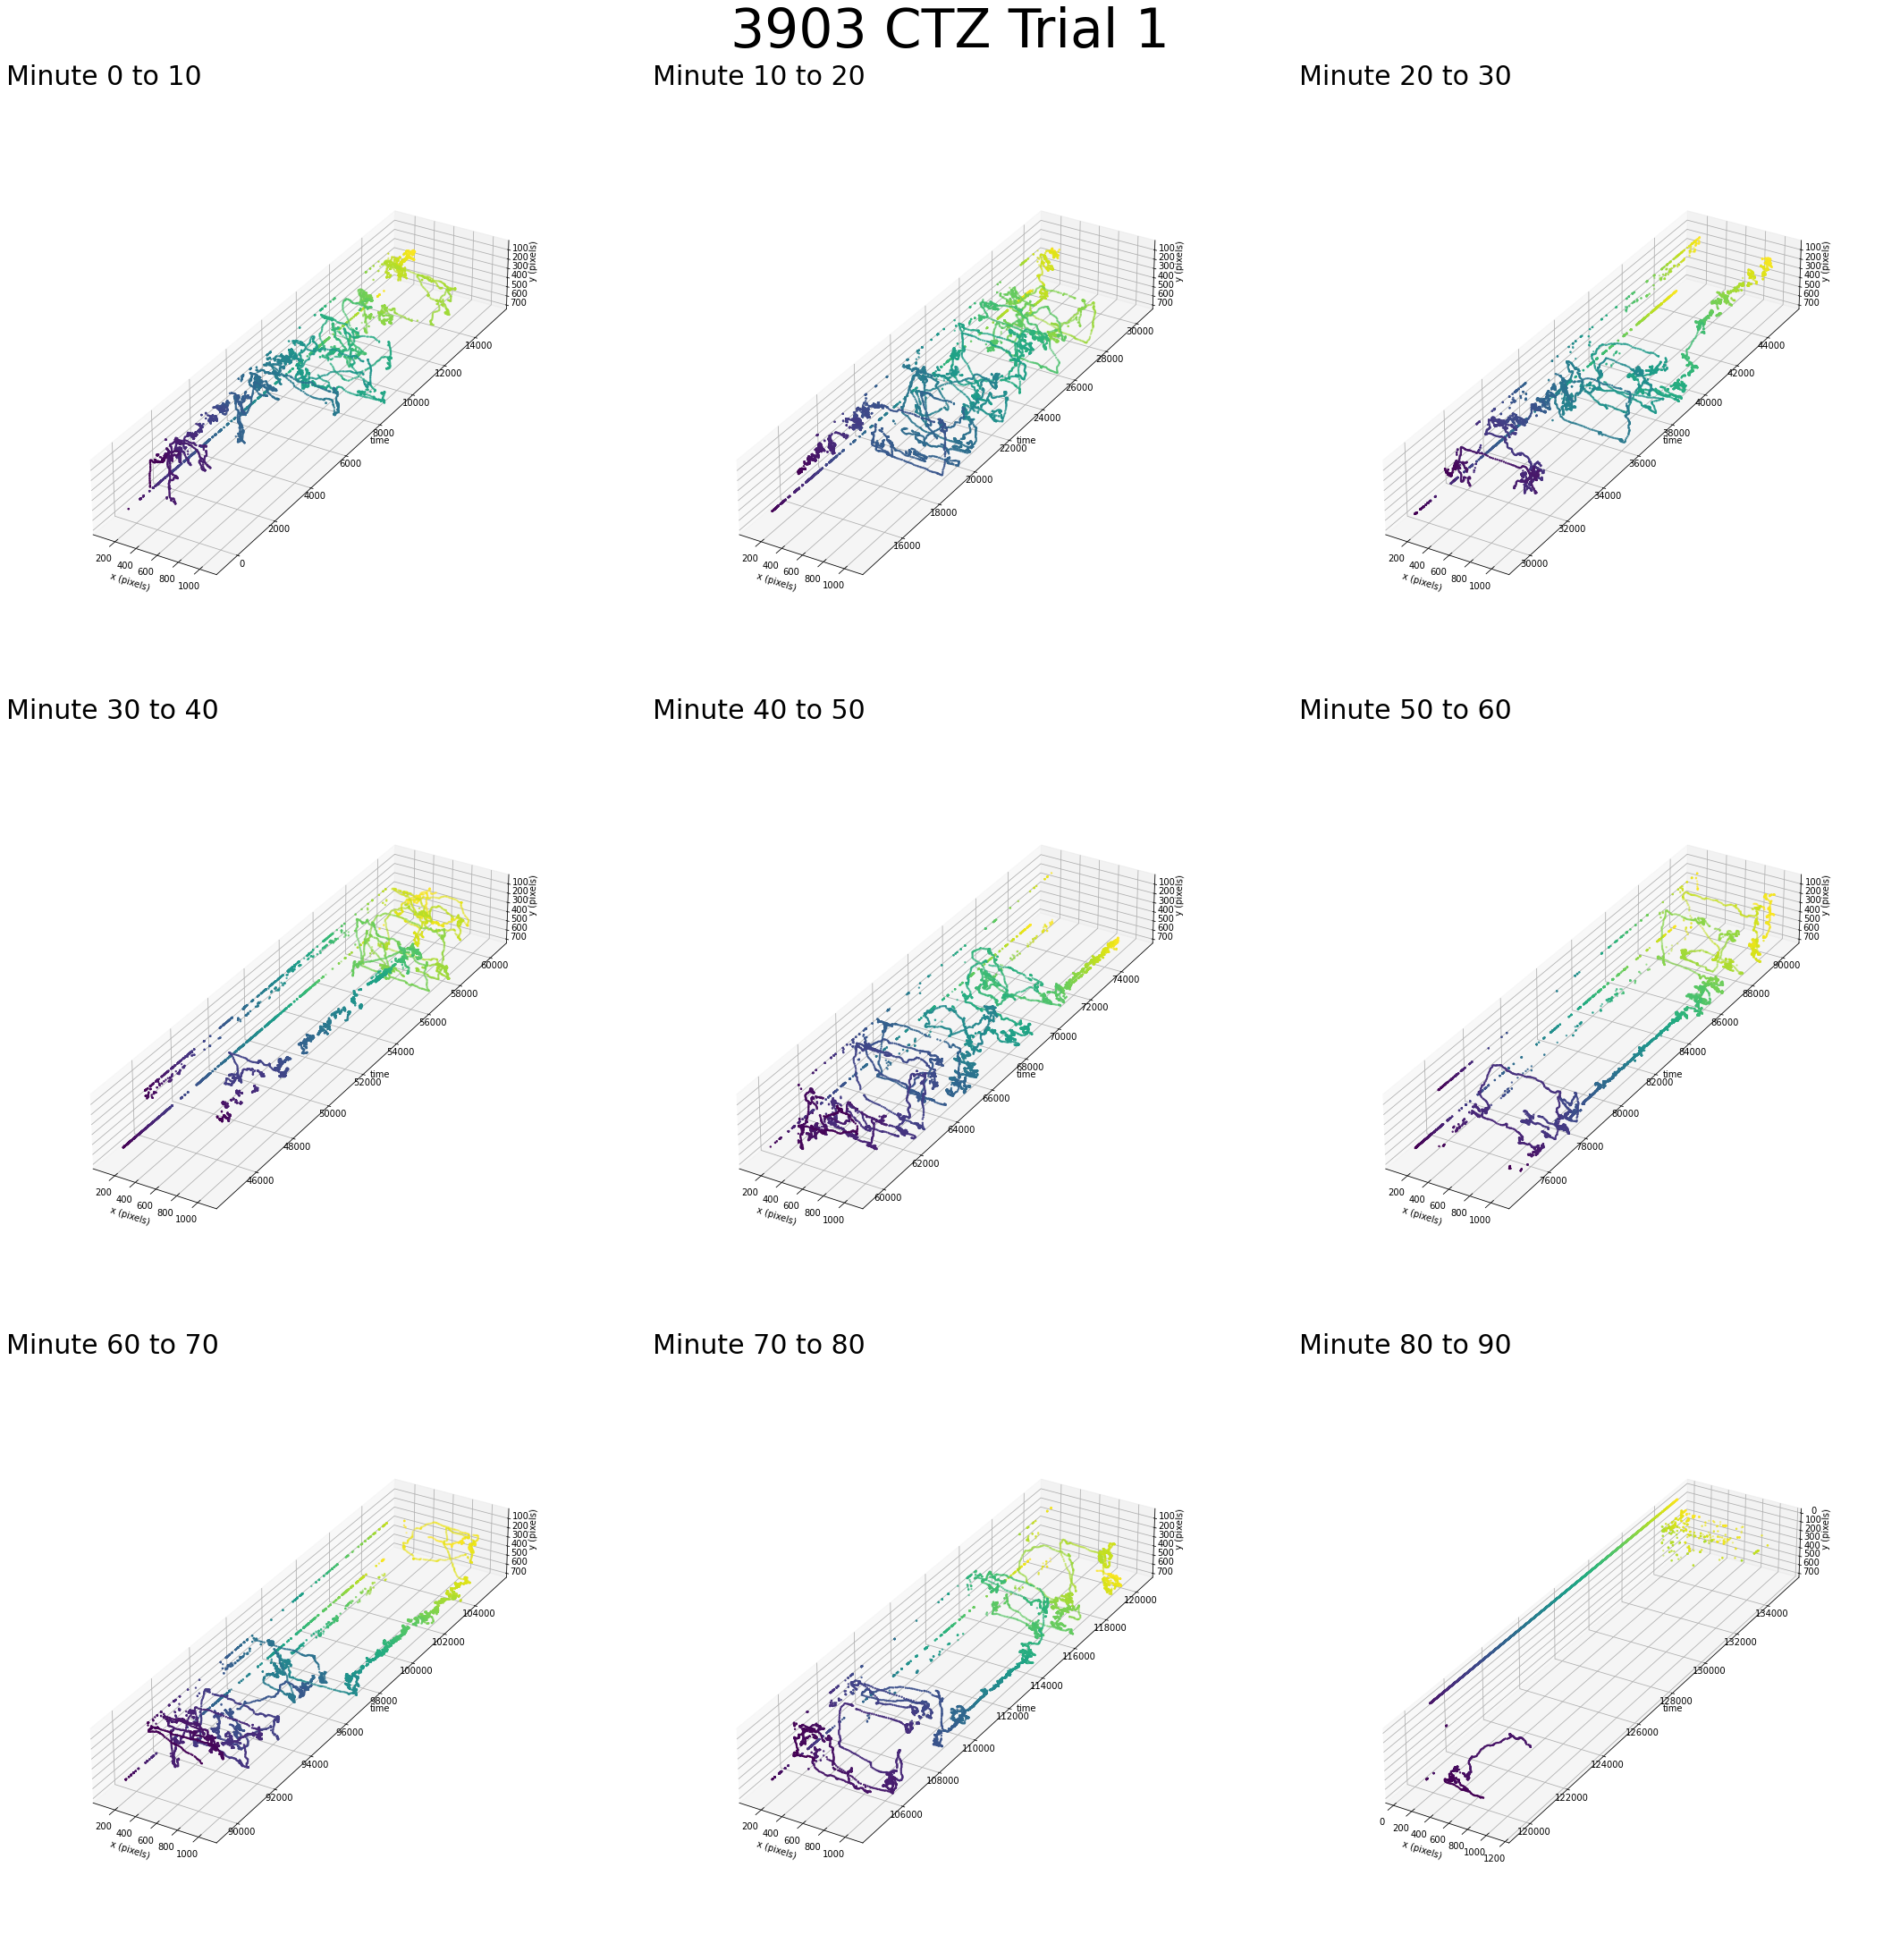

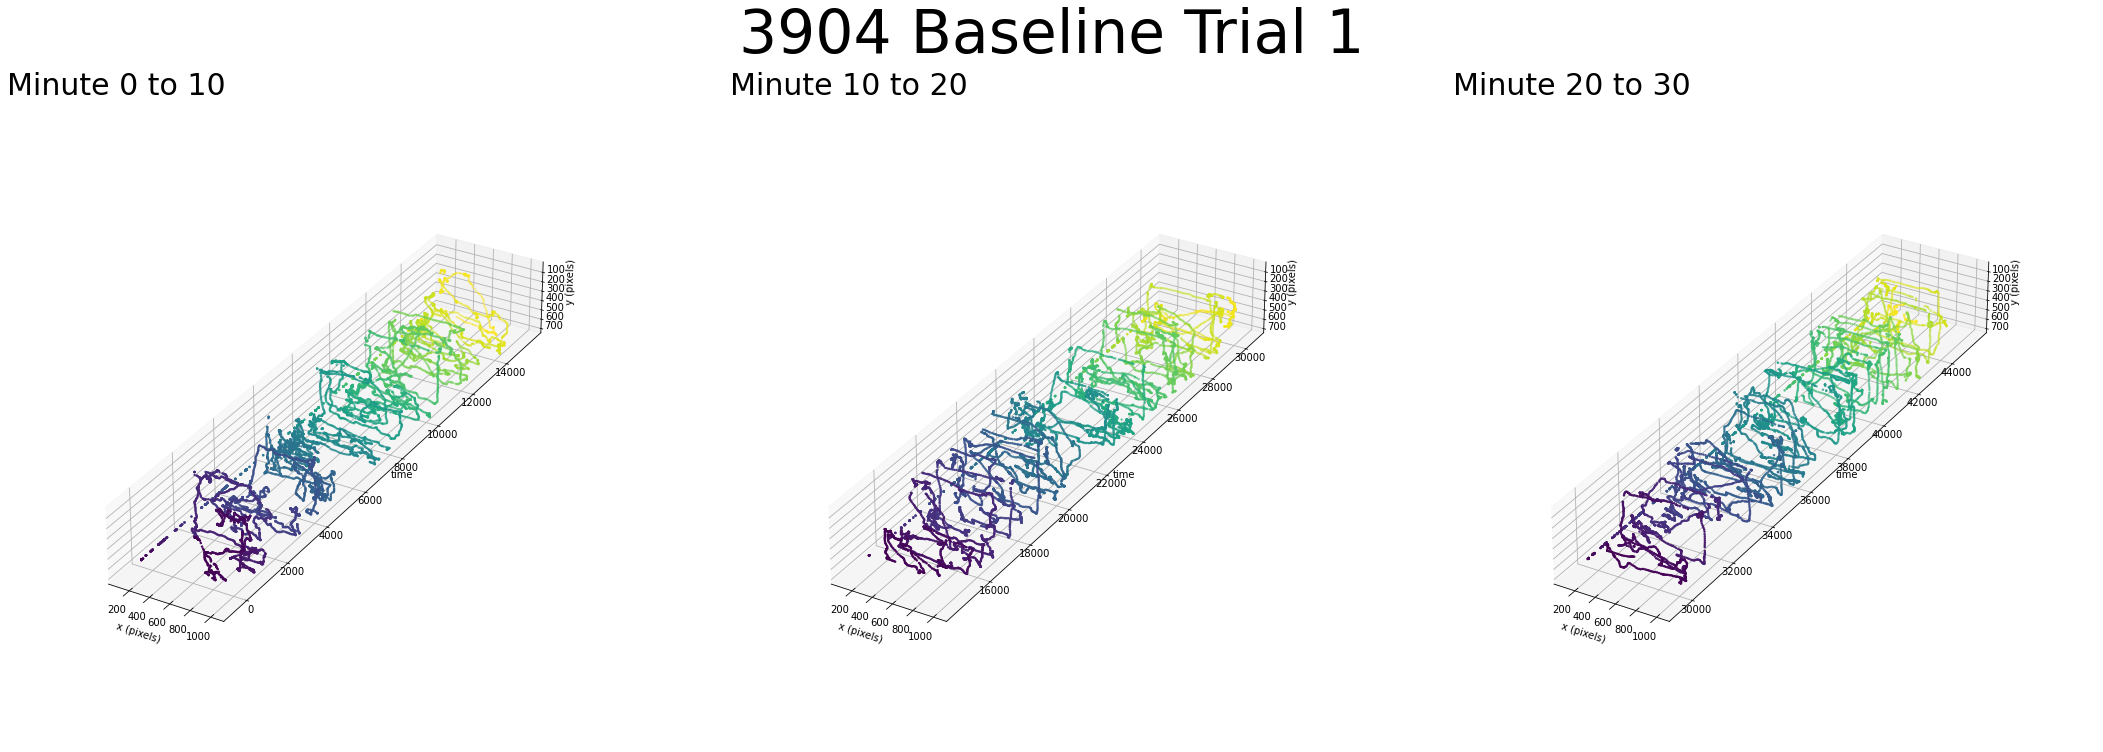

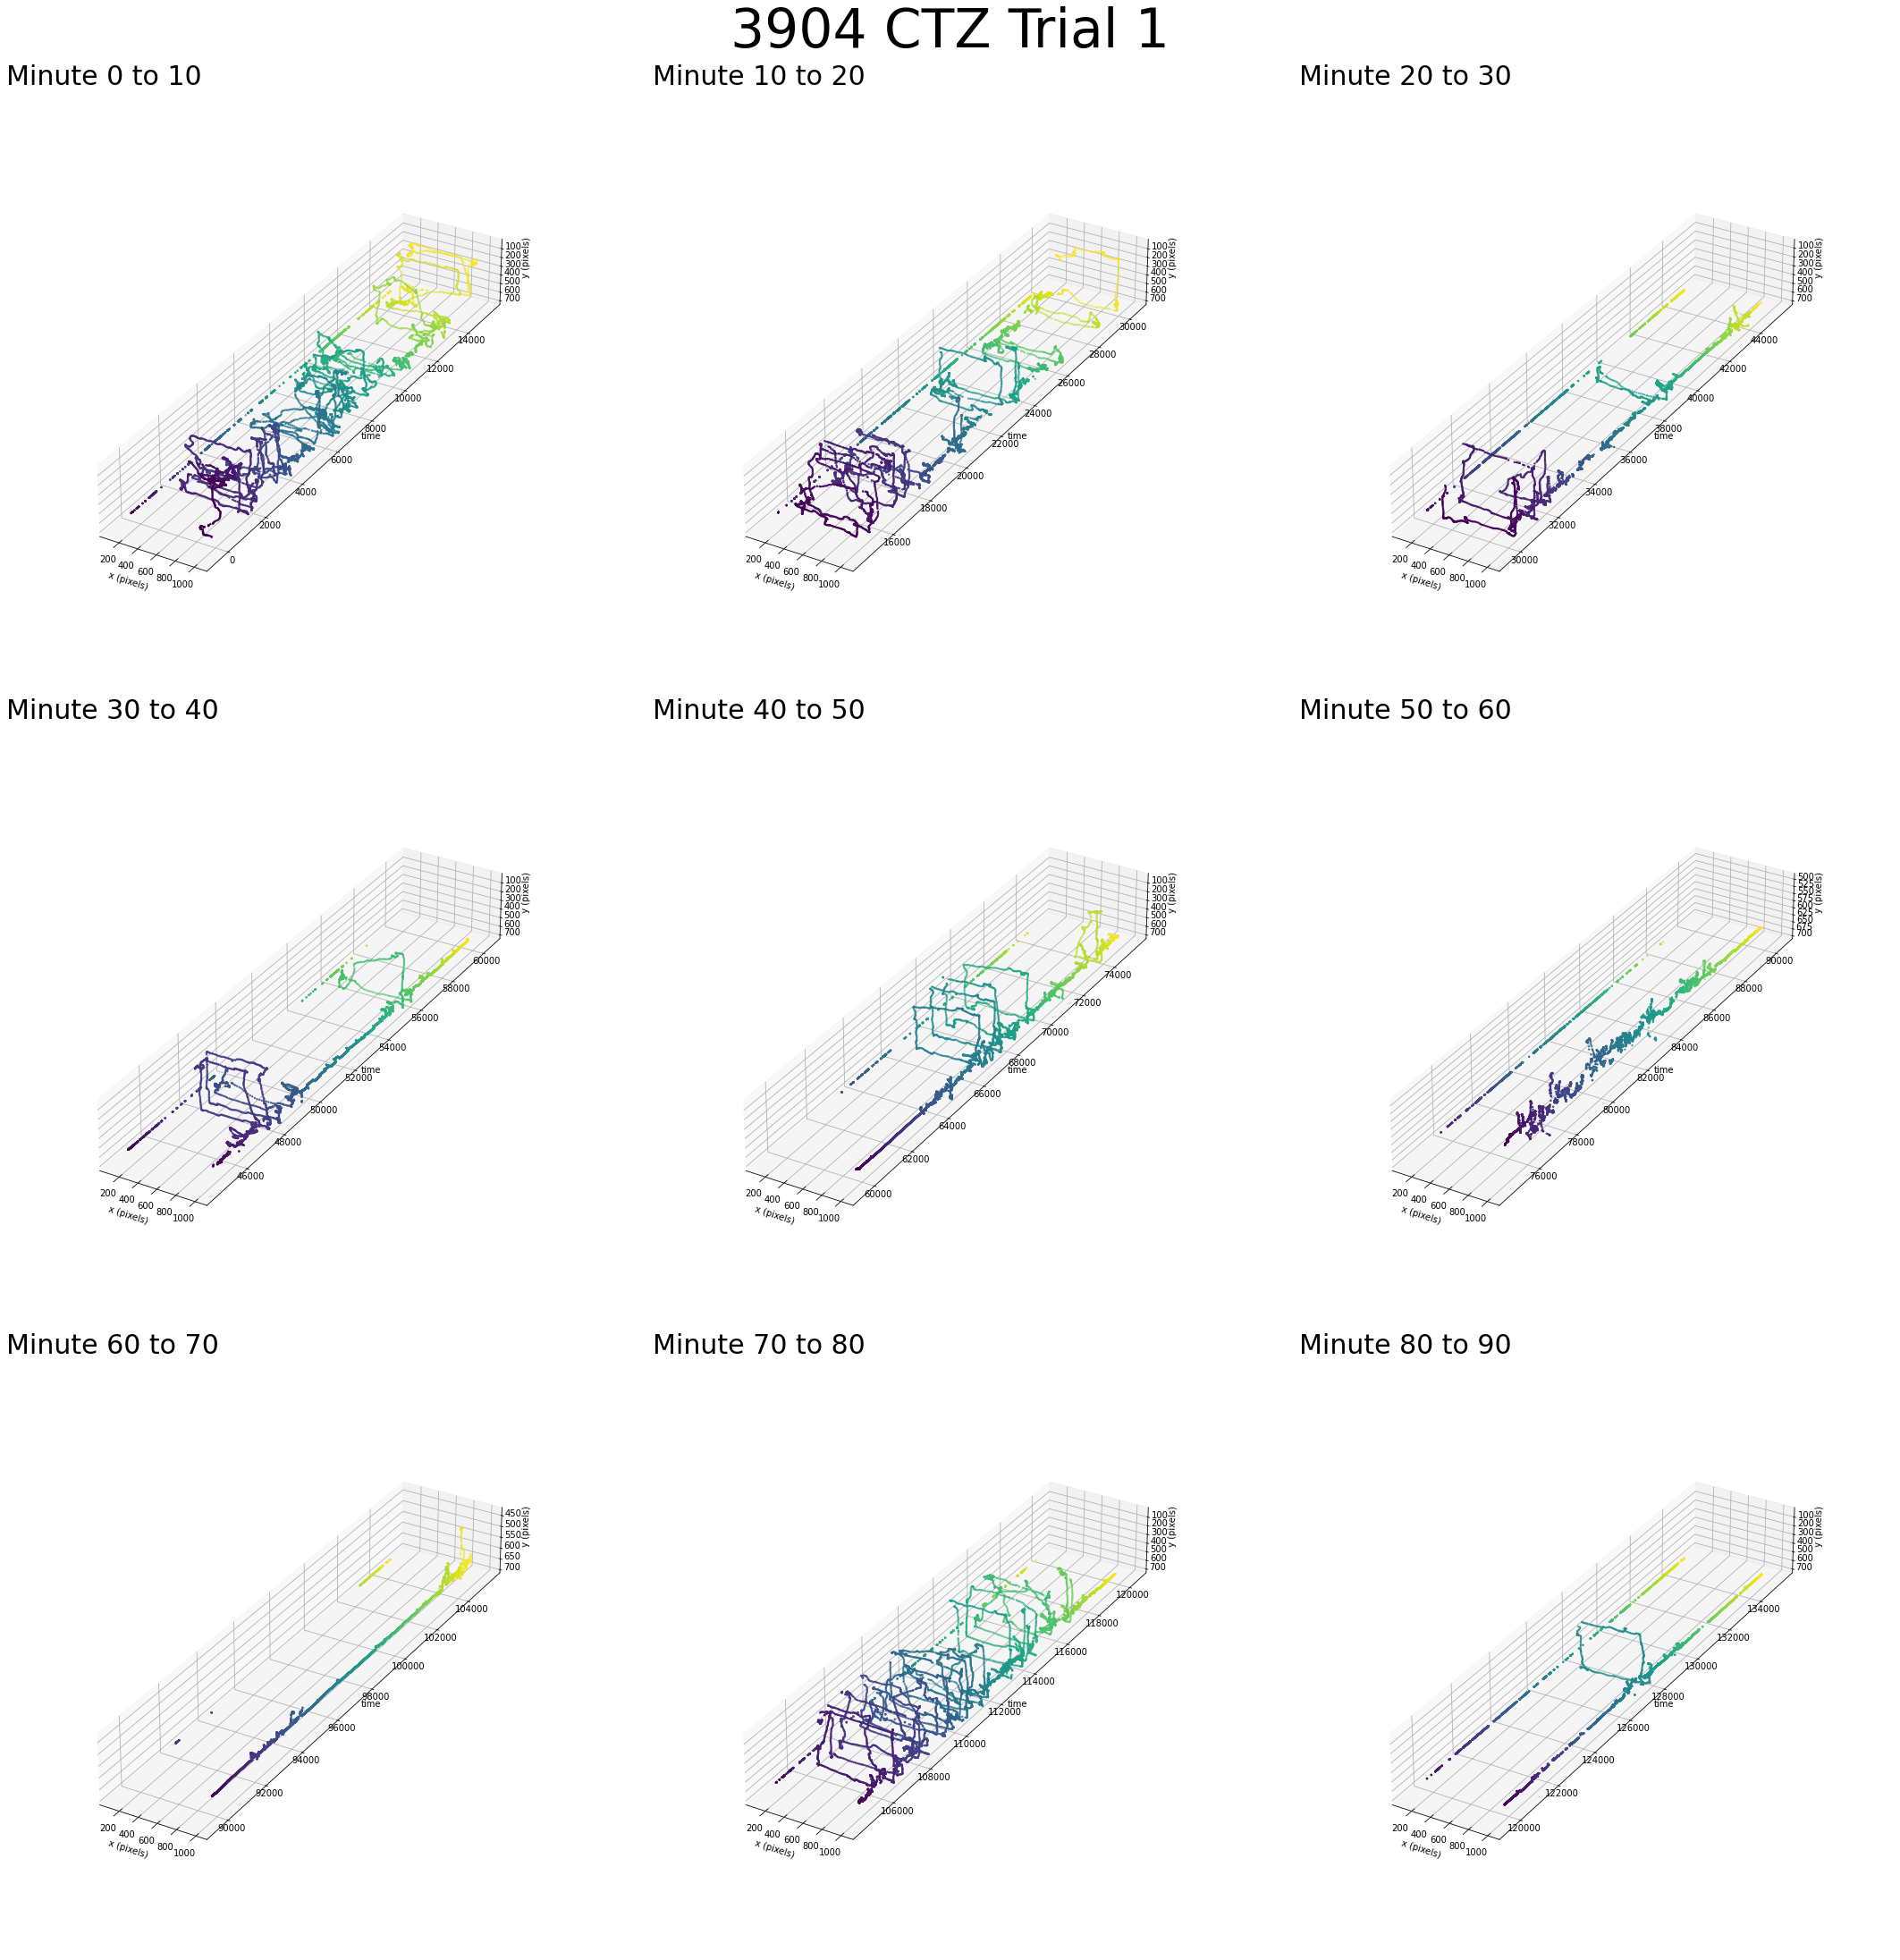

In [46]:
#The code below follows the format of the plotTrajectory3DSubplots function defined above.

#def plotTrajectory3DSubplots(title, hdf_path, DLCscorer, bpt = 'snout', fps=25, numColumns=3, minutesPerPlot = 10):

#Change the string variables below to reflect the title, hdf_path, and DLCscorer you want to plot.

#hdf_path should reflect the filtered.h5 file obtained from DeepLabCut for each video
#DLC scorer should reflect the network used to train the videos and can also be found at the end of the filtered.h5 file name (after the video name) you use as hdf_path. Refer to the examples below.

#Examples shown below

plotTrajectory3DSubplots('3901 Baseline Trial 1',
                       '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3901_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                       'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000')
plotTrajectory3DSubplots('3901 CTZ Trial 2',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrround2ffz_3901_f_Trial2DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000')
plotTrajectory3DSubplots('3903 Baseline Trial 1',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3903_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000')
plotTrajectory3DSubplots('3903 CTZ Trial 1',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrffz_3903_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000')
plotTrajectory3DSubplots('3904 Baseline Trial 1',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3904_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000')
plotTrajectory3DSubplots('3904 CTZ Trial 1',
                      '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrffz_3904_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5',
                      'DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000')
print()